# Modeling

In [1]:
filepath = 'C:/Users/Tim/Desktop/lighthouse/w11,12 - final project/'
data_filepath = filepath + 'data/'
final_data = 'final_df.csv'

import pandas as pd
import numpy as np
import copy
import seaborn as sns

In [2]:
df = pd.read_csv(data_filepath + final_data)
df.head()

,player,date,team,team_rounds,opposing_team,opposing_team_rounds,map,kills,deaths,differential,...,team_rank,kdr,kpr,n_impact,performance,rank_differential,rank_weight,w_performance,perf_resid,perf_resid_lag
0,s1mple,2020-02-29,Natus Vincere,16,Astralis,5,nuke,18,11,7,...,6,1.636364,0.857143,0.330758,1.850758,-5,1.5,2.776137,1.256137,1.256137
1,s1mple,2020-02-29,Natus Vincere,16,Astralis,5,d2,25,11,14,...,6,2.272727,1.190476,0.330758,2.420758,-5,1.5,3.631137,1.541137,1.256137
2,electronic,2020-02-29,Natus Vincere,16,Astralis,5,nuke,22,5,17,...,6,4.400000,1.047619,0.165008,2.025008,-5,1.5,3.037512,1.177512,1.177512
3,electronic,2020-02-29,Natus Vincere,16,Astralis,5,d2,15,11,4,...,6,1.363636,0.714286,0.165008,1.325008,-5,1.5,1.987512,0.827512,1.177512
4,flamie,2020-02-29,Natus Vincere,16,Astralis,5,nuke,23,10,13,...,6,2.300000,1.095238,-0.036592,1.753408,-5,1.5,2.630112,0.840112,0.840112


In [3]:
df['date'] = pd.to_datetime(df.date)
df = df.replace([np.inf, -np.inf], np.nan).dropna()
df = df[df['team']!='Sprout']

In [4]:
def info(x):
    n_missing = x.isnull().sum().sort_values(ascending=False)
    p_missing = (x.isnull().sum()/x.isnull().count()).sort_values(ascending=False)
    inf = x.isin([np.inf, -np.inf]).sum().sort_values(ascending=False)
    dtype = x.dtypes
    count = x.count()
    missing_ = pd.concat([n_missing, p_missing, inf, dtype, count],axis=1, keys = [
        'number_missing',
        'percent_missing',
        'contains_inf',
        'type',
        'count'
    ])
    return missing_
info(df)

,number_missing,percent_missing,contains_inf,type,count
player,0,0.0,0,object,28293
date,0,0.0,0,datetime64[ns],28293
perf_resid,0,0.0,0,float64,28293
w_performance,0,0.0,0,float64,28293
rank_weight,0,0.0,0,float64,28293
rank_differential,0,0.0,0,int64,28293
performance,0,0.0,0,float64,28293
n_impact,0,0.0,0,float64,28293
kpr,0,0.0,0,float64,28293
kdr,0,0.0,0,float64,28293


<AxesSubplot:>

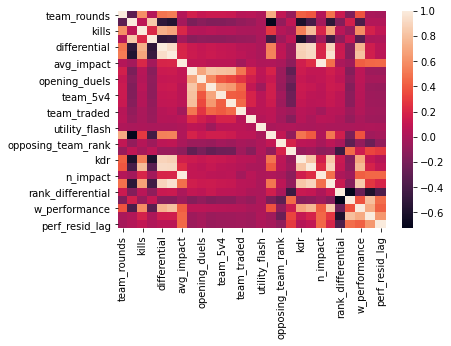

In [5]:
dfcorr = df.corr()
sns.heatmap(dfcorr)

## Machine Learning

In [8]:
# # for training
# rows = []
# for index, row in df.iterrows():
#     temp = []
#     temp.append(row['team'])
#     temp.append(row['target'])
#     temp.append(row['rank_differential']) # shouldnt use rank differential here since it biases the team against better teams
#     # instead we should use weighted performance and see how performing against different teams affects performance of players
#     temp.append(row['kdr'])
#     temp.append(row['kpr'])
#     temp.append(row['w_performance']) # df['performance'] = df['rating'] + df['n_impact']
#     temp.append(row['perf_resid'])
#     temp.append(row['perf_resid_lag'])
#     temp.append(row['utility_flash'])
#     temp.append(row['utility_adr'])
#     temp.append(row['team_traded'])
#     temp.append(row['team_4v5'])
#     temp.append(row['team_5v4'])

#     rows.append(temp)
    
    
# for predictions
# rows2 = []
# for index2, row2 in df.iterrows():
#     temp2 = []
#     temp2.append(row2['team'])
#     temp2.append(row2['opposing_team'])
#     temp2.append(row2['map'])
#     temp2.append(row2['target'])
#     temp2.append(row2['rank_differential'])
#     temp2.append(row2['kdr'])
#     temp2.append(row2['kpr'])
#     temp2.append(row2['performance']) # df['performance'] = df['rating'] + df['n_impact']
#     temp2.append(row2['perf_resid'])
#     temp2.append(row2['perf_resid_lag'])
#     temp2.append(row2['utility_flash'])
#     temp2.append(row2['utility_adr'])
#     temp2.append(row2['team_traded'])
#     temp2.append(row2['team_4v5'])
#     temp2.append(row2['team_5v4'])

# try 1
# features = [
#     'team',
#     'target',
#     'kdr', # weighting kills against deaths - direct performance measure
#     'kpr', # weighting kills against how long game is (longer = more)
#     # 'rank_differential',
#     # 'performance', # shouldnt use rank differential here since it biases players against better teams
#     # instead we should use weighted performance and see how performing against different ranked teams affects performance of players
#     'w_performance',
#     'perf_resid',
#     'perf_resid_lag',
#     'utility_flash',
#     'utility_adr',
#     'team_traded',
#     'team_4v5',
#     'team_5v4'
# ]    

# try 2
drop=['target',
#       'opposing_team',
      'player',
      'date',
      'kills',
      'deaths',
#       'kdr',
#       'kpr',
#       'w_performance',
#       'perf_resid_lag',
#       'perf_resid',
      'rank_weight',
      'team_rank',
      'opposing_team_rank',
      'p_rounds_won',
#       'opening_duels',
#       'multi_kills',
      'avg_impact',
      'differential',
      'rating',
      'team_rounds',
      'opposing_team_rounds'
]
df = df.sample(frac=1)
# data = df[features]
X = df.drop(columns=drop)
y = df['target']

In [9]:
# try knn, svm, log reg, random forest, xgboost
import plotly.express as px

from sklearn.model_selection import train_test_split

from sklearn_pandas import DataFrameMapper
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelBinarizer, LabelEncoder
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [10]:
X = pd.get_dummies(X)

In [11]:
info(X)

,number_missing,percent_missing,contains_inf,type,count
opening_duels,0,0.0,0,float64,28293
opposing_team_Orbit,0,0.0,0,uint8,28293
opposing_team_Millenium,0,0.0,0,uint8,28293
opposing_team_Misfits,0,0.0,0,uint8,28293
opposing_team_NIP,0,0.0,0,uint8,28293
...,...,...,...,...,...
opposing_team_Arcade,0,0.0,0,uint8,28293
opposing_team_Aristocracy,0,0.0,0,uint8,28293
opposing_team_Astralis,0,0.0,0,uint8,28293
opposing_team_BIG,0,0.0,0,uint8,28293


In [12]:
X.head()

,opening_duels,multi_kills,team_5v4,team_4v5,team_traded,utility_adr,utility_flash,kdr,kpr,n_impact,...,opposing_team_x6tence Galaxy,map_cbl,map_cch,map_d2,map_inf,map_mrg,map_nuke,map_ovp,map_trn,map_vtg
13276,0.486,0.81,0.747,0.231,0.200,27.5,0.22,0.812500,0.520000,0.189408,...,0,0,0,0,0,1,0,0,0,0
25460,0.473,0.73,0.688,0.258,0.213,20.5,0.29,0.758621,0.628571,0.037958,...,0,0,0,0,1,0,0,0,0,0
23190,0.481,0.80,0.746,0.270,0.192,17.1,0.18,0.888889,0.615385,-0.026242,...,0,0,0,0,0,0,0,1,0,0
12557,0.519,0.74,0.669,0.278,0.187,22.0,0.20,0.842105,0.571429,0.189408,...,0,0,0,1,0,0,0,0,0,0
9404,0.515,0.87,0.757,0.313,0.206,18.5,0.23,1.750000,0.777778,-0.015792,...,0,0,0,0,0,1,0,0,0,0


In [13]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=123)

In [14]:
numerical = list(X.dtypes[X.dtypes != 'object'].index)

categorical = list(X.dtypes[X.dtypes == 'object'].index)

In [16]:
num_pipe = make_pipeline(
     StandardScaler(), # don't really need, most are under similar scale
#      SelectKBest(k=10),
#      PCA(n_components=3)
)

# mapper = DataFrameMapper(
#     [(c, LabelEncoder()) for c in categorical]
# )
# cat_pipe = make_pipeline(
# #     mapper,
#     OneHotEncoder(drop='first',sparse=False)
# #     LabelBinarizer()
# )

preprocessor = ColumnTransformer(
    transformers = [
        ('continuous', num_pipe, numerical),
#         ('categorical', cat_pipe, categorical)
    ]
)

In [17]:
# regressors = {
#     'LogReg': SGDClassifier(loss='log'),
#     'SVC': SGDClassifier(loss='hinge'),
#     'KNN': KNeighborsClassifier(),
#     'RandomForest': RandomForestClassifier()
# }

# model_pipe = Pipeline(steps = [
#     ('preprocess', preprocessor),
#     ('clf', )
# ])

# for key, regressor in regressors.items():
#     model_pipe = Pipeline(steps = [
#         ('preprocess', preprocessor),
#         ('clf', regressor)
#     ])
#     model_pipe.fit(x_train,y_train)
#     train_score = cross_val_score(model_pipe,x_train,y_train,cv=10)
#     print(f'Regressor:\tScore:\tScore STD:\n{key}\t{train_score.mean()}\t{train_score.std()}')


# Regressor:	Score:	Score STD:
# LogReg	0.8138642417816808	0.007659355830766036
# Regressor:	Score:	Score STD:
# SVC	0.8029961752200478	0.0092827057704196
# Regressor:	Score:	Score STD:
# KNN	0.801581342350206	0.007385415413212891
# Regressor:	Score:	Score STD:
# RandomForest	0.819740498166073	0.004244082816819046

# rf best so far

In [19]:
model_pipe = Pipeline(steps = [
#     ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(n_jobs=-1))
])

In [23]:
model_pipe.fit(x_train,y_train)
y_pred = model_pipe.predict(x_test)

In [25]:
train_score = cross_val_score(model_pipe,x_train,y_train,cv=10)
print(f'Train Score:\t{train_score.mean()}\nTScore STD:\t {train_score.std()}')

Train Score:	0.8134227018139404
TScore STD:	 0.00750250478566649


In [26]:
acc = metrics.accuracy_score(y_test,y_pred)
print(acc)

exp_var = metrics.explained_variance_score(y_test,y_pred)
print(exp_var)

cr = metrics.classification_report(y_test, y_pred)
print(cr)

0.8305354302880368
0.31282866821794664
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      2493
           1       0.84      0.86      0.85      3166

    accuracy                           0.83      5659
   macro avg       0.83      0.83      0.83      5659
weighted avg       0.83      0.83      0.83      5659



In [ ]:
# run in colab

# # max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# # max_depth.append(None)

# param_grid = {'clf__n_estimators': [100,300,500], 
#               'clf__max_features': ['auto', 'sqrt'],
#               'clf__max_depth': [None, 10, 50, 100, 200],
#               'clf__min_samples_split': [2, 5, 10],
#               'clf__min_samples_leaf': [1, 2, 4],
#               # 'preprocess__continuous__pca__n_components': [0,2,4]
#              }
# rs = RandomizedSearchCV(model_pipe, 
#                         param_distributions=param_grid,
#                         n_iter=100,
#                         cv=5,
#                         n_jobs=-1,
#                         verbose=1)
# rs.fit(x_train, y_train)

# best_hyperparams = rs.best_params_
# best_acc = rs.score(x_test, y_test)
# print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')

In [30]:
import shap

In [31]:
# def predict(model, data, target):
#     explainer = shap.TreeExplainer(xgboost_model)
#     shap_values = explainer.shap_values(data)
#     shap.initjs()
#     return shap.force_plot(explainer.expected_value[1], shap_values[1], target, matplotlib=True)

explainer = shap.TreeExplainer(model_pipe)
shap_values = explainer.shap_values(x_test)

shap.force_plot(explainer.expected_value,shap_values[0,:],x_test[0,:])

Exception: Model type not yet supported by TreeExplainer: <class 'sklearn.pipeline.Pipeline'>

In [ ]:
# param_grid = {'clf__n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)], 
#               'clf__max_features': ['auto', 'sqrt'],
#               'clf__max_depth': max_depth,
#               'clf__min_samples_split': [2, 5, 10],
#               'clf__min_samples_leaf': [1, 2, 4],
#               'preprocess__continuous__selectkbest__k': [2,4,6,8,10]
#               # 'preprocess__continuous__pca__n_components': [0,2,4]
#              }
# grid = GridSearchCV(model_pipe, param_grid=param_grid, cv=5,n_jobs=-1,verbose=1)
# grid.fit(x_train, y_train)

# best_model = grid.best_estimator_
# best_hyperparams = grid.best_params_
# best_acc = grid.score(x_test, y_test)
# print(f'Best test set accuracy: {best_acc}\nAchieved with hyperparameters: {best_hyperparams}')